<a href="https://colab.research.google.com/github/tikendraw/stock-price-prediction/blob/main/stock_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies Import


In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install yfinance -q
    !pip install skforecast -q
    !pip install scikit-learn=='1.1.2' -q
    !pip install tsfresh -q
    !pip install pmdarima -q
    !git clone https://github.com/tikendraw/funcyou.git -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.8 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
import yfinance as yf
from tqdm  import tqdm
from pmdarima import auto_arima, AutoARIMA
from pmdarima.arima import ARIMA

In [5]:
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from funcyou.timeseries.utils import WindowData
from skforecast.ForecasterAutoreg import ForecasterAutoreg

import matplotlib.pyplot as plt
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import ARDRegression
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from skforecast.model_selection import backtesting_forecaster


In [6]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ardl import ARDL, ARDLResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [7]:
from skforecast.model_selection import backtesting_forecaster


# Reading Data

In [8]:
# Get the data

def get_stock_data(symbol, start_date, end_date):
    """
    Retrieves stock price data for a given symbol from Yahoo Finance for a given time period.
    
    :param symbol: str, the stock symbol to retrieve data for
    :param start_date: str, the start date in YYYY-MM-DD format
    :param end_date: str, the end date in YYYY-MM-DD format
    :return: pandas.DataFrame, the stock price data for the given symbol and time period
    """
    # Use the yfinance library to get the stock data
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    return stock_data


In [9]:
data = get_stock_data('AAPL', '2010-01-01', '2023-03-01')


[*********************100%***********************]  1 of 1 completed


In [10]:
print('before dropping nan: ',shape_before_:= data.shape)
print(data.isnull().sum())
data.dropna(inplace=True)
print('after dropping nan: ',data.shape)

print(f'\nThere were {shape_before_[0]- data.shape[0]} null values')

before dropping nan:  (3311, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
after dropping nan:  (3311, 6)

There were 0 null values


In [11]:
# Renaming in lower case
data.columns = data.columns.str.lower()
data = data.sort_index()

In [12]:
data.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [13]:
pred_col = 'close'

In [14]:
df = data[pred_col]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df,test_size = .1,shuffle=False)

In [17]:
print(f'''
{train.shape = }
{test.shape  = }''')


train.shape = (2979,)
test.shape  = (332,)


<Axes: xlabel='Date'>

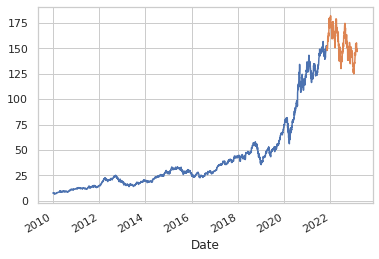

In [18]:
train.plot()
test.plot()

# Data Analysis

## 1. Stationarity check (Dickey–Fuller test)

**Null Hypothesis:** The null hypothesis of the Dickey-Fuller test is that the time series is non-stationary (i.e., it has a unit root). If the p-value of the test is less than the chosen significance level (typically 0.05), then we reject the null hypothesis and conclude that the time series is stationary. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

**If p value > .05 ==> data is not stationary 
else data is stationary **

ADF test statistic: 0.11979155184754471
ADF p-values: 0.9673866648180923
ADF number of lags used: 22
ADF number of observations: 3288
ADF critical values: {'1%': -3.432340393120014, '5%': -2.8624194377787564, '10%': -2.567238143040978}
ADF best information criterion: 11586.495313620278


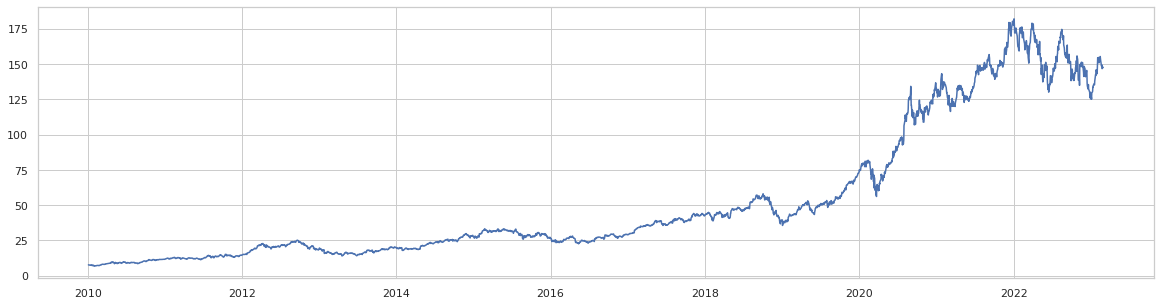

In [19]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

plt.figure(figsize = (20,5))
plt.plot(df)

In [20]:
from pmdarima.arima.stationarity import ADFTest

# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(data[pred_col])  # (0.01, False)

In [21]:
print('p_val: ',p_val)
print('should_diff: ',should_diff)

p_val:  0.7189854587251866
should_diff:  True


**data is NOT Stationarity**

## 2. Check for Trend

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

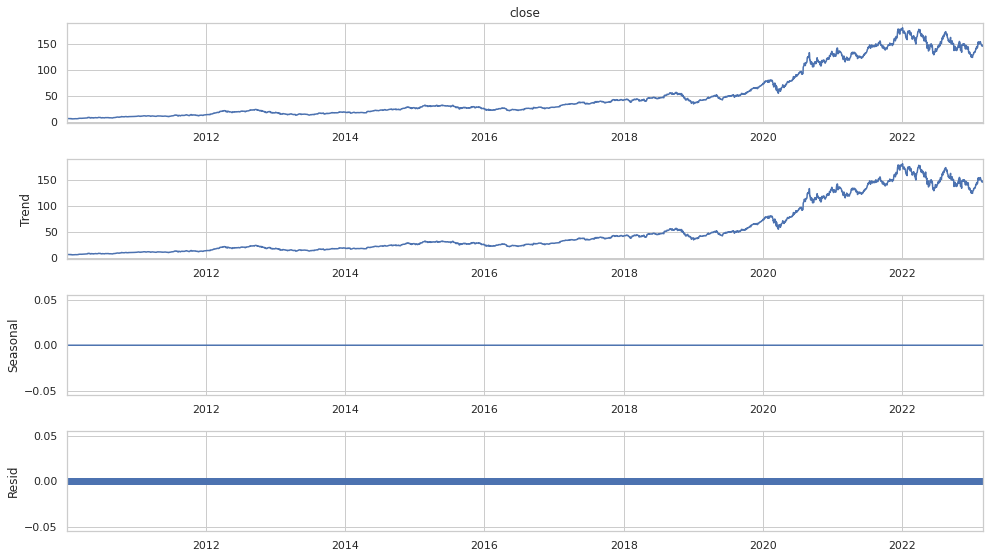

In [23]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df,model='additive',period = 1)
fig = result.plot()
plt.suptitle('seasonal decompose additive')
plt.tight_layout()

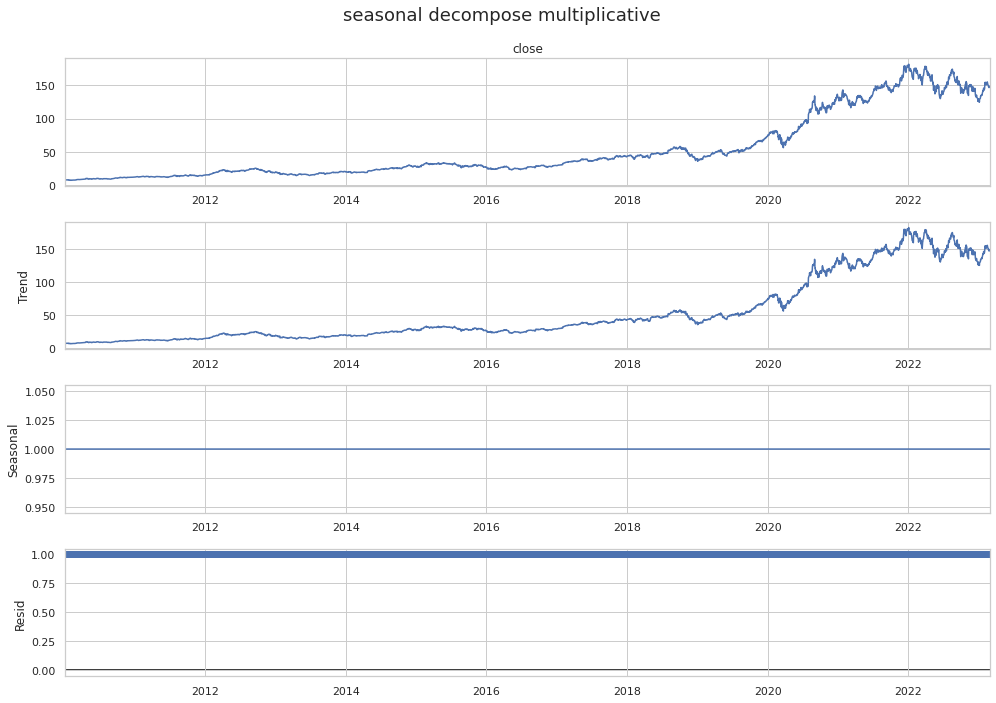

In [26]:
plt.rc('figure',figsize=(14,10))
plt.rc('font',size=15)

result = seasonal_decompose(df,model='multiplicative',period = 1)
fig = result.plot()
plt.suptitle('seasonal decompose multiplicative')
plt.tight_layout()

In [28]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(df, test='adf')  # -> 0

# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(df, test='kpss')  # -> 0

# Or a PP test:
n_pp = ndiffs(df, test='pp')  # -> 0
# assert n_adf == n_kpss == n_pp == 0

print('n_adf: ',n_adf)
print('n_kpss: ',n_kpss)
print('n_pp: ',n_pp)

n_adf:  1
n_kpss:  1
n_pp:  1


## 3. ACF and PACF plots


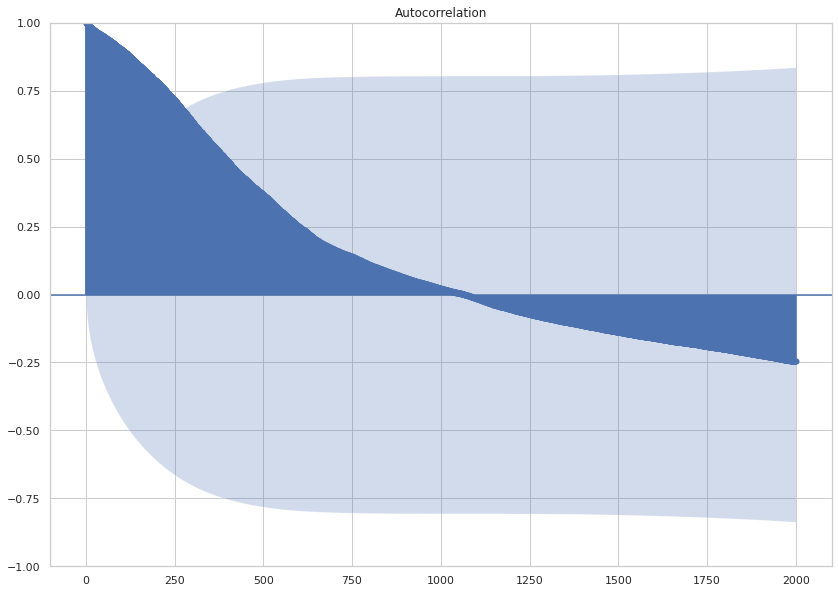

In [29]:
plot_acf(df, lags=2000);

Well, seems upto 1000 lags the data has good correlation to lags, but we would just consider 7 or 22(this number is comming from adfuller test from statsmodel) for less computation power usage

In [30]:
p = 7  # 22      AR lag (autoregressive lag)

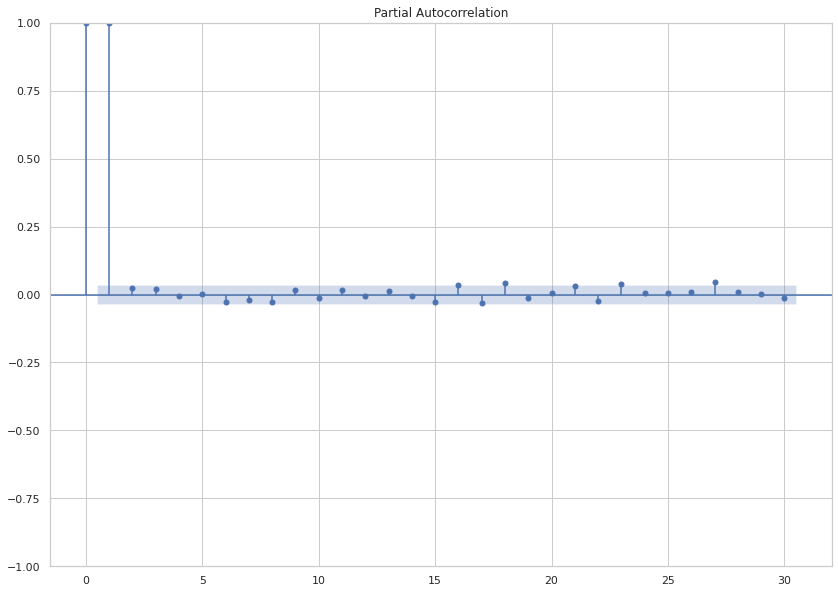

In [31]:
plot_pacf(df, lags=30);

Clearly just 2 lags are very auto correlated so q = 2

## 4. Check Diff

In [32]:
from pmdarima.arima.utils import ndiffs

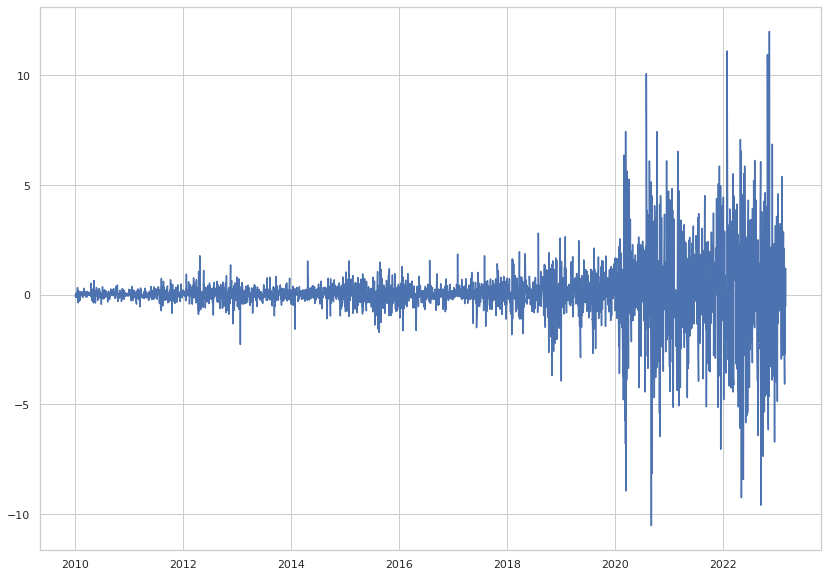

In [33]:
diff = df.diff()
plt.plot(diff)

In [34]:
d = ndiffs(df)
d

1

In [35]:
q = 2 # MA lag (moving average)

The Different data preparaion below is for skforecast algorithms

# Helper Functions

In [36]:
# score print function
def score(ytest, ypred):
    ytest = np.squeeze(ytest)
    ypred = np.squeeze(ypred)

    if ypred.shape==ytest.shape:
        scores ={
        'MSE' : mean_squared_error(ytest, ypred),
        'MAE' : mean_absolute_error(ytest, ypred),
        'MAPE': mean_absolute_percentage_error(ytest, ypred)}
        return scores
    else:
        raise ValueError('Shapes do not match')

In [37]:
# plot prediction function
def plot_pred(ytest, ypred, title=None):
    # plt.figure(figsize = (25,5))
    plt.grid(True)
    plt.plot(ytest, label= 'true')
    plt.plot(ypred, label = 'pred')
    plt.legend()
    plt.title(title)

# Model

In [38]:
window = WindowData(data[[pred_col]])
xtr_, xts_  = window.train_test_val(test_size = .1,shuffle = False)
xtrain, ytrain = xtr_
xtest, ytest   = xts_  
print('xtrain.shape: ',xtrain.shape)
print('ytrain.shape: ',ytrain.shape)
print('xtest.shape: ',xtest.shape)
print('ytest.shape: ',ytest.shape)

xtrain.shape:  (2974, 7, 1)
ytrain.shape:  (2974, 1, 1)
xtest.shape:  (330, 7, 1)
ytest.shape:  (330, 1, 1)


In [39]:
# Making it 2D data
xtrain = np.squeeze(xtrain)
ytrain = np.squeeze(ytrain).reshape(-1,1)
xtest = np.squeeze(xtest)
ytest = np.squeeze(ytest).reshape(-1,1)

In [40]:
print('xtrain.shape: ',xtrain.shape)
print('ytrain.shape: ',ytrain.shape)
print('xtest.shape: ',xtest.shape)
print('ytest.shape: ',ytest.shape)

xtrain.shape:  (2974, 7)
ytrain.shape:  (2974, 1)
xtest.shape:  (330, 7)
ytest.shape:  (330, 1)


## 1. ARDR Regression

In [41]:
#models
m1 =  ARDRegression()
m1.fit(xtrain, ytrain)

ARDRegression()

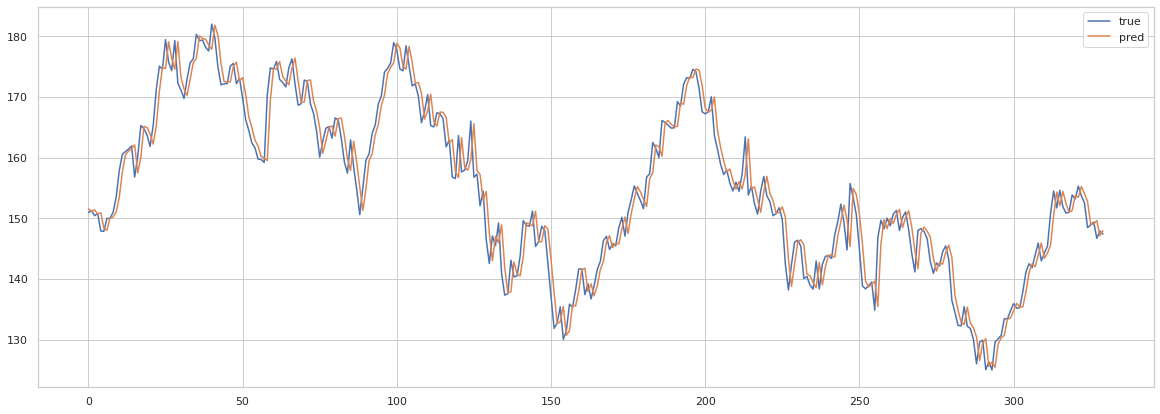

In [42]:
m1pred = m1.predict(xtest) 

plt.figure(figsize = (20,7))
plot_pred(ytest, m1pred)

In [43]:
m1score = score(ytest,m1pred)
m1score

{'MSE': 10.651336040568692,
 'MAE': 2.548191776169587,
 'MAPE': 0.016609303970455666}

## 2. ARIMA

In [58]:
from pmdarima.arima import AutoARIMA
import pmdarima as pm

In [44]:
len(xtrain), len(xtest)

(2974, 330)

In [80]:
test_size = len(xtest)/len(df) # to keep the constant test size

In [81]:
train, test = train_test_split(df, test_size = test_size, shuffle = False)

print('train shape: ',train.shape, '\test shape: ',test.shape )

train shape:  (2981,) 	est shape:  (330,)


In [54]:
arima = AutoARIMA(start_p=7, max_p=8, d=1, start_q = 2, max_q = 3 )

In [55]:
arima = arima.fit(df)

In [56]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3311
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -5823.888
Date:                Sun, 26 Mar 2023   AIC                          11669.776
Time:                        10:59:57   BIC                          11736.928
Sample:                             0   HQIC                         11693.810
                               - 3311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1463      0.088      1.666      0.096      -0.026       0.319
ar.L1         -1.7225      0.034    -49.984      0.000      -1.790      -1.655
ar.L2         -0.9267      0.035    -26.567      0.0

In [70]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=False,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12, start_p = 5, max_p = 7, start_q = 2, max_q = 3, d = 1)

# Create predictions for the future, evaluate on test
preds, conf_int = arima.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Test RMSE: 17.537


In [73]:
print(type(conf_int), len(conf_int))
print(type(preds), len(preds))

<class 'numpy.ndarray'> 330
<class 'pandas.core.series.Series'> 330


In [76]:
conf_int.shape

(330, 2)

In [84]:
import numpy as np
import pmdarima as pm
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima
from matplotlib import pyplot as plt

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces

# Let's create a pipeline with multiple stages... the Wineind dataset is
# seasonal, so we'll include a FourierFeaturizer so we can fit it without
# seasonality
pipe = pipeline.Pipeline([
    ("fourier", ppc.LogEndogTransformer()),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              suppress_warnings=True, start_p = 5, max_p = 7, start_q = 2, max_q = 3, d = 1))
])

pipe.fit(train)
print("Model fit:")
print(pipe)

# We can compute predictions the same way we would on a normal ARIMA object:
preds, conf_int = pipe.predict(n_periods=len(test), return_conf_int=True)
print("\nForecasts:")
print(preds)

pmdarima version: 2.0.3
Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-15579.784, Time=8.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15582.318, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15588.343, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15588.143, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15574.780, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-15586.839, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15587.801, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15584.781, Time=3.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15579.801, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 16.342 seconds
Model fit:
Pipeline(steps=[('fourier', LogEndogTransformer()),
                ('arima',
                 AutoARIMA(d=1, error_action='ignore', max_p=7, max_q=3,
                           seasonal=False, start_p=5, trace=1))])

Forecasts:
[15

In [ ]:
m2pred = arima.predict()


In [ ]:
len(m1pred), len(m2pred)

(330, 3311)

In [ ]:
df.tail()

Date
2023-02-22    148.910004
2023-02-23    149.399994
2023-02-24    146.710007
2023-02-27    147.919998
2023-02-28    147.410004
Name: close, dtype: float64

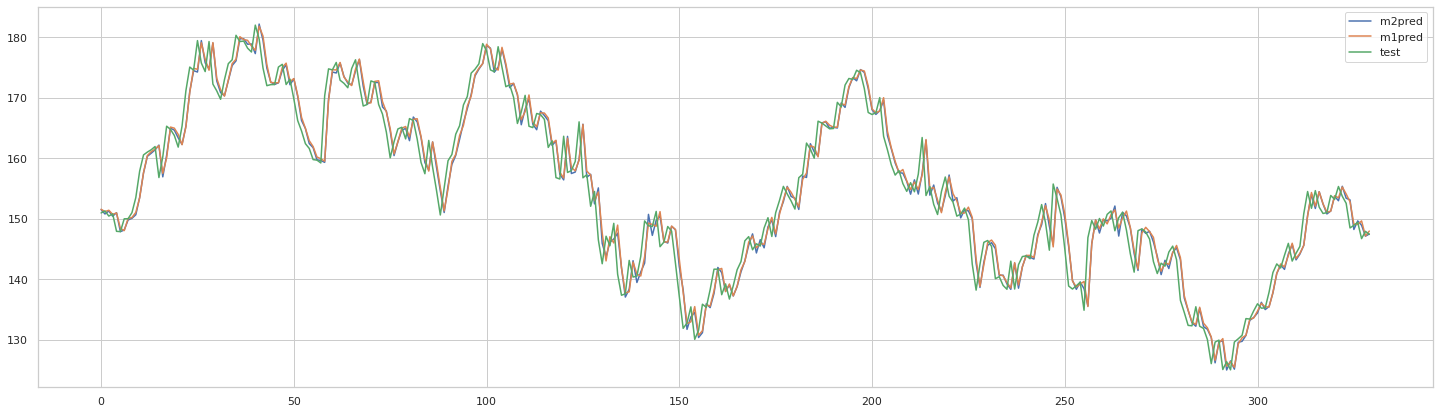

In [ ]:
plt.figure(figsize = (25,7))
plt.plot(m2pred.values[-len(ytest):], label = 'm2pred')
plt.plot(m1pred, label = 'm1pred')
# plt.plot(ytest)
plt.plot(ytest, label = 'test')
plt.legend()

In [ ]:
params = arima.params
params

ar.L1    -1.768559
ar.L2    -0.959742
ar.L3    -0.120107
ar.L4    -0.070495
ar.L5     0.033319
ar.L6     0.065104
ar.L7     0.038675
ma.L1     1.735247
ma.L2     0.861067
sigma2    1.978103
dtype: float64

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = ARDRegression(),
                lags      = 7 
             )

In [ ]:
metric, m3pred = backtesting_forecaster(
                                    forecaster = forecaster,
                                    y          = df,
                                    initial_train_size = len(train),
                                    steps      = 330,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 2981
Number of observations used for backtesting: 330
    Number of folds: 1
    Number of steps per fold: 330

Data partition in fold: 0
    Training:   2010-01-04 00:00:00 -- 2021-11-03 00:00:00  (n=2981)
    Validation: 2021-11-04 00:00:00 -- 2023-02-28 00:00:00  (n=330)



In [ ]:
len(m3pred)

330

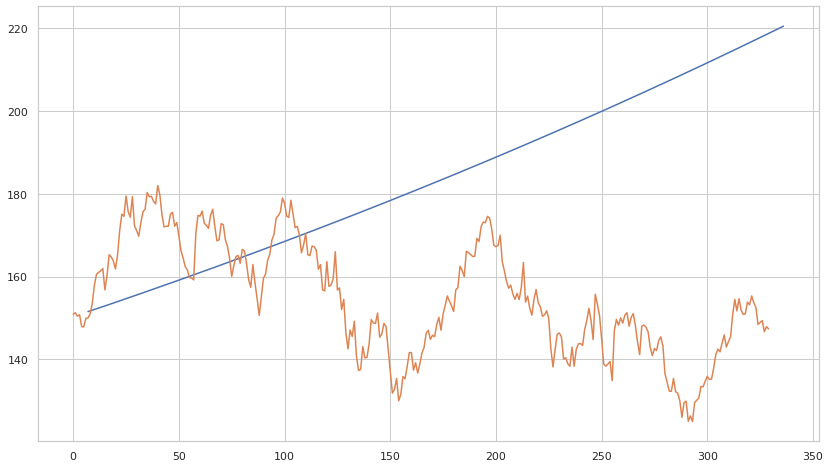

In [ ]:
plt.plot(m3pred)
plt.plot(test.values)

In [ ]:
model = auto_arima(train, seasonal=True,n_jobs = -1)
preds = model.predict(test.shape[0])

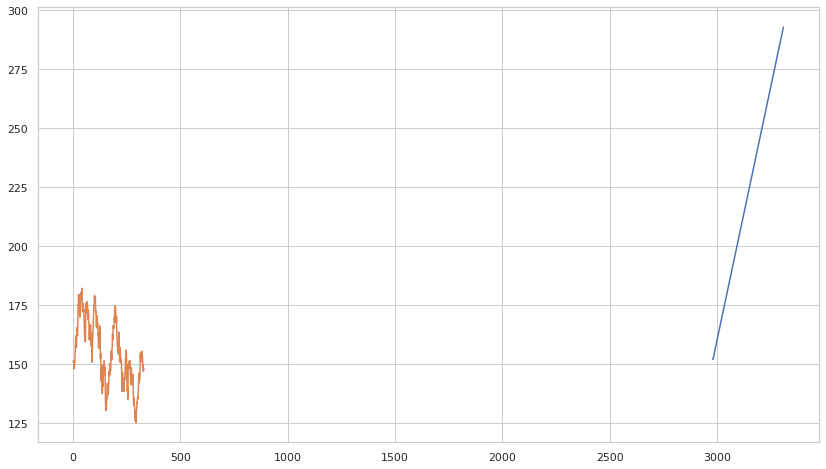

In [ ]:
plt.plot(preds)
plt.plot(test.values)